# Import Statements

In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

# Opening the File to see the list of parameters

### Pass 5.1

In [2]:
pass5file = '/home/rykore/pass5.1/2.63_3.45e-11_1000000_35_1.0_combined_rec.root'

with uproot.open(pass5file) as file:
    t = file['XCDF']
    t.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
rec.status           | uint64_t                 | AsDtype('>u8')
rec.version          | uint64_t                 | AsDtype('>u8')
rec.eventID          | uint64_t                 | AsDtype('>u8')
rec.runID            | uint64_t                 | AsDtype('>u8')
rec.timeSliceID      | uint64_t                 | AsDtype('>u8')
rec.trigger_flags    | uint64_t                 | AsDtype('>u8')
rec.event_flags      | uint64_t                 | AsDtype('>u8')
rec.gtc_flags        | uint64_t                 | AsDtype('>u8')
rec.gpsSec           | uint64_t                 | AsDtype('>u8')
rec.gpsNanosec       | uint64_t                 | AsDtype('>u8')
rec.nChTot           | uint64_t                 | AsDtype('>u8')
rec.nChAvail         | uint64_t                 | AsDtype('>u8')
rec.nHitTot          | uint64_t                 | AsDtype(

### Pass 4

In [3]:
pass4file = '/home/rykore/pass4/2.63_3.45e-11_1000000_0_1.0_combined_rec.root'

with uproot.open(pass4file) as file:
    t = file['XCDF']
    t.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
rec.nFit             | uint64_t                 | AsDtype('>u8')
rec.status           | uint64_t                 | AsDtype('>u8')
rec.version          | uint64_t                 | AsDtype('>u8')
rec.eventID          | uint64_t                 | AsDtype('>u8')
rec.runID            | uint64_t                 | AsDtype('>u8')
rec.timeSliceID      | uint64_t                 | AsDtype('>u8')
rec.trigger_flags    | uint64_t                 | AsDtype('>u8')
rec.event_flags      | uint64_t                 | AsDtype('>u8')
rec.gtc_flags        | uint64_t                 | AsDtype('>u8')
rec.gpsSec           | uint64_t                 | AsDtype('>u8')
rec.gpsNanosec       | uint64_t                 | AsDtype('>u8')
rec.nChTot           | uint64_t                 | AsDtype('>u8')
rec.nChAvail         | uint64_t                 | AsDtype(

# Redefining variables based on what is needed

### Pass 5.1

In [4]:
dset = dict()

with uproot.open(pass5file) as file:
    t = file['XCDF']
    dset["zenithAngle"] = t["rec.zenithAngle"].array(library="np")
    dset["azimuthAngle"] = t["rec.azimuthAngle"].array(library="np")
    dset["nHit"] = t["rec.nHit"].array(library="np")  # nHit > 75 - new cut
    dset["protonlheEnergy"] = t["rec.protonlheEnergy"].array(library="np")  # reconstructed proton energy
    dset["PINC"] = t["rec.PINC"].array(library="np")
    dset["CxPE40XnCh"] = t["rec.CxPE40XnCh"].array(library="np") 
    dset["angleFitStatus"] = t["rec.angleFitStatus"].array(library="np")
    dset["coreFitStatus"] = t["rec.coreFitStatus"].array(library="np")
    # fit status of the reconstruction, 0 meaning successfull and != 0 means unsuccessful
    dset["cuts"] = np.logical_and(dset["angleFitStatus"] == 0, dset["coreFitStatus"] == 0)
    dset["corsikaParticleId"] = t["mc.corsikaParticleId"].array(library="np")
    dset["weights"] = t["sweets.IWgt"].array(library="np")
    # corsikaParticleId != 1 - Excludes gamma rays
    dset["cuts"] = np.logical_and(dset["cuts"] , dset["corsikaParticleId"]!=1 , dset["nHit"] > 75)
    dset["cuts"] = np.logical_and(dset["cuts"], dset["PINC"] > 1.2)
    dset["logEnergy"] = t["mc.logEnergy"].array(library="np")  # true energy
    dset["logNNEnergy"] = t["rec.logNNEnergy"].array(library="np")  # reconstructed energy

In [5]:
initial_cuts_5 = dset["cuts"]
zenith_angle_5 = dset["zenithAngle"][initial_cuts_5]
true_log_E_5 = dset["logEnergy"][initial_cuts_5]
rec_log_nnE_5 = dset["logNNEnergy"][initial_cuts_5]
rec_prot_E_5 = dset["protonlheEnergy"][initial_cuts_5]
weights_5 = dset["weights"][initial_cuts_5]

In [6]:
len(dset["logNNEnergy"])
len(initial_cuts_5)

29035661

In [7]:
len(rec_log_nnE_5)

5185506

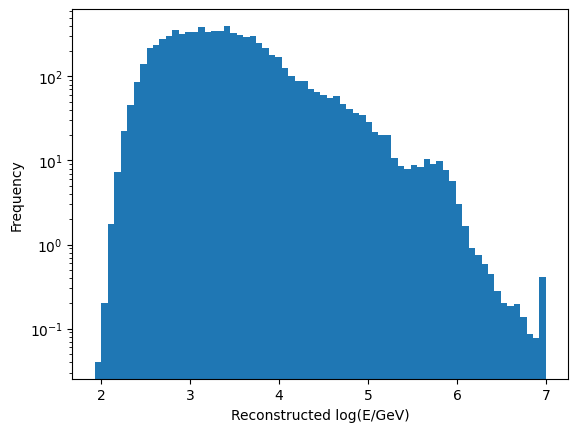

In [8]:
# adding weights - gives the simulated data a weight to make it closer to the actual data
plt.hist(rec_log_nnE_5, bins = 70, log=True, weights = weights_5)
plt.xlabel("Reconstructed log(E/GeV)")
plt.ylabel("Frequency")
plt.show()

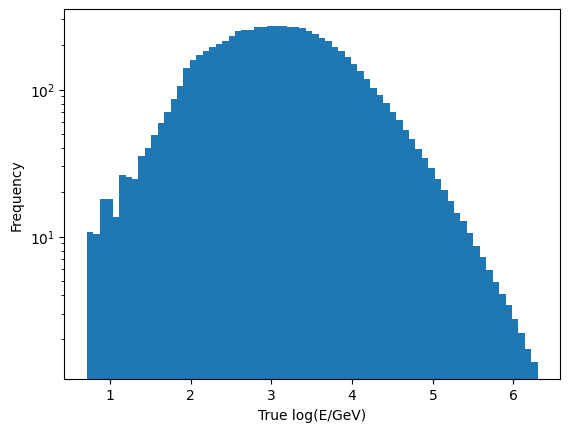

In [9]:
plt.hist(true_log_E_5, bins = 70, log=True, weights = weights_5)
plt.xlabel("True log(E/GeV)")
plt.ylabel("Frequency")
plt.show()

### Pass 4

In [10]:
dset = dict()

with uproot.open(pass4file) as file:
    t = file['XCDF']
    dset["zenithAngle"] = t["rec.zenithAngle"].array(library="np")
    dset["azimuthAngle"] = t["rec.azimuthAngle"].array(library="np")
    dset["nHit"] = t["rec.nHit"].array(library="np")  # nHit > 75 - new cut
    dset["protonlheEnergy"] = t["rec.protonlheEnergy"].array(library="np")  # reconstructed proton energy
    dset["PINC"] = t["rec.PINC"].array(library="np")
    dset["CxPE40XnCh"] = t["rec.CxPE40XnCh"].array(library="np") 
    dset["angleFitStatus"] = t["rec.angleFitStatus"].array(library="np")
    dset["coreFitStatus"] = t["rec.coreFitStatus"].array(library="np")
    # fit status of the reconstruction, 0 meaning successfull and != 0 means unsuccessful
    dset["cuts"] = np.logical_and(dset["angleFitStatus"] == 0, dset["coreFitStatus"] == 0)
    dset["corsikaParticleId"] = t["mc.corsikaParticleId"].array(library="np")
    dset["weights"] = t["sweets.IWgt"].array(library="np")
    # corsikaParticleId != 1 - Excludes gamma rays
    dset["cuts"] = np.logical_and(dset["cuts"] , dset["corsikaParticleId"]!=1 , dset["nHit"] > 75)
    dset["cuts"] = np.logical_and(dset["cuts"], dset["PINC"] > 1.2)
    dset["logEnergy"] = t["mc.logEnergy"].array(library="np")  # true energy
    dset["logNnEnergy"] = t["rec.logNnEnergy"].array(library="np")  # reconstructed energy

In [11]:
initial_cuts_4 = dset["cuts"]
zenith_angle_4 = dset["zenithAngle"][initial_cuts_4]
true_log_E_4 = dset["logEnergy"][initial_cuts_4]
rec_log_nnE_4 = dset["logNnEnergy"][initial_cuts_4]
rec_prot_E_4 = dset["protonlheEnergy"][initial_cuts_4]
weights_4 = dset["weights"][initial_cuts_4]

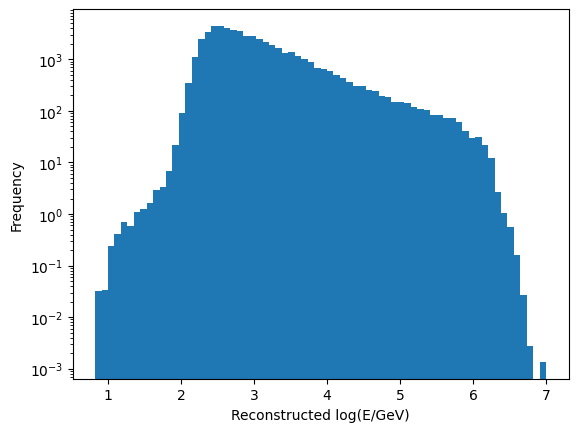

In [12]:
# adding weights - gives the simulated data a weight to make it closer to the actual data
plt.hist(rec_log_nnE_4, bins = 70, log=True, weights = weights_4)
plt.xlabel("Reconstructed log(E/GeV)")
plt.ylabel("Frequency")
plt.show()

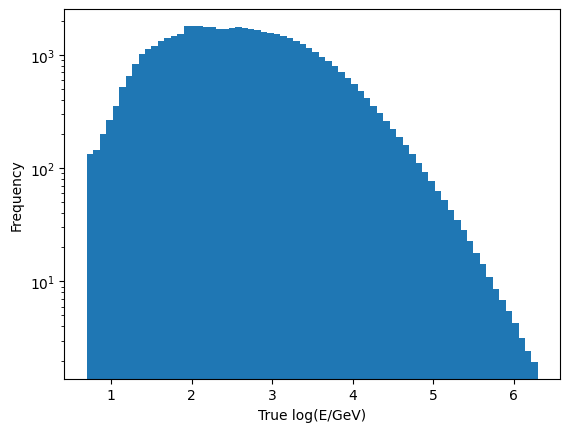

In [13]:
plt.hist(true_log_E_4, bins = 70, log=True, weights = weights_4)
plt.xlabel("True log(E/GeV)")
plt.ylabel("Frequency")
plt.show()

# Cutting and binning the Energy

cut 1 = 1 Tev - 10 TeV  \
cut 2 = 10 TeV - 30 TeV\
cut 3 = 30 TeV - 50 TeV\
cut 4 = 50 TeV - 70 TeV\
cut 5 = 70 TeV - 100 TeV\
cut 6 = 100 TeV - 200 TeV\
cut 7 = 200 TeV - 300 TeV

In [14]:
# true cuts for pass 5.1
true_cut1_5 = np.logical_and(true_log_E_5 >= np.log10(1e3),true_log_E_5 < np.log10(1e4))
true_cut2_5 = np.logical_and(true_log_E_5 >= np.log10(1e4),true_log_E_5 < np.log10(3e4))
true_cut3_5 = np.logical_and(true_log_E_5 >= np.log10(3e4),true_log_E_5 < np.log10(5e4))
true_cut4_5 = np.logical_and(true_log_E_5 >= np.log10(5e4),true_log_E_5 < np.log10(7e4))
true_cut5_5 = np.logical_and(true_log_E_5 >= np.log10(7e4),true_log_E_5 < np.log10(1e5))
true_cut6_5 = np.logical_and(true_log_E_5 >= np.log10(1e5),true_log_E_5 < np.log10(2e5))
true_cut7_5 = np.logical_and(true_log_E_5 >= np.log10(2e5),true_log_E_5 <= np.log10(3e5))
# true_cut5_5 = true_log_E_5 > np.log10(7e4)

In [15]:
# reconstructed cuts for pass 5.1
rec_cut1_5 = np.logical_and(rec_log_nnE_5 >= np.log10(1e3),rec_log_nnE_5 < np.log10(1e4))
rec_cut2_5 = np.logical_and(rec_log_nnE_5 >= np.log10(1e4),rec_log_nnE_5 < np.log10(3e4))
rec_cut3_5 = np.logical_and(rec_log_nnE_5 >= np.log10(3e4),rec_log_nnE_5 < np.log10(5e4))
rec_cut4_5 = np.logical_and(rec_log_nnE_5 >= np.log10(5e4),rec_log_nnE_5 < np.log10(7e4))
rec_cut5_5 = np.logical_and(rec_log_nnE_5 >= np.log10(7e4),rec_log_nnE_5 < np.log10(1e5))
rec_cut6_5 = np.logical_and(rec_log_nnE_5 >= np.log10(1e5),rec_log_nnE_5 < np.log10(2e5))
rec_cut7_5 = np.logical_and(rec_log_nnE_5 >= np.log10(2e5),rec_log_nnE_5 <= np.log10(3e5))
# rec_cut5_5 = rec_log_nnE_5 > np.log10(7e4)

In [16]:
# true cuts for pass 4
true_cut1_4 = np.logical_and(true_log_E_4 >= np.log10(1e3),true_log_E_4 < np.log10(1e4))
true_cut2_4 = np.logical_and(true_log_E_4 >= np.log10(1e4),true_log_E_4 < np.log10(3e4))
true_cut3_4 = np.logical_and(true_log_E_4 >= np.log10(3e4),true_log_E_4 < np.log10(5e4))
true_cut4_4 = np.logical_and(true_log_E_4 >= np.log10(5e4),true_log_E_4 < np.log10(7e4))
true_cut5_4 = np.logical_and(true_log_E_4 >= np.log10(7e4),true_log_E_4 < np.log10(1e5))
true_cut6_4 = np.logical_and(true_log_E_4 >= np.log10(1e5),true_log_E_4 < np.log10(2e5))
true_cut7_4 = np.logical_and(true_log_E_4 >= np.log10(2e5),true_log_E_4 <= np.log10(3e5))
# true_cut5_4 = true_log_E_4 > np.log10(7e4)

In [17]:
# reconstructed cuts for pass 4
rec_cut1_4 = np.logical_and(rec_log_nnE_4 >= np.log10(1e3),rec_log_nnE_4 < np.log10(1e4))
rec_cut2_4 = np.logical_and(rec_log_nnE_4 >= np.log10(1e4),rec_log_nnE_4 < np.log10(3e4))
rec_cut3_4 = np.logical_and(rec_log_nnE_4 >= np.log10(3e4),rec_log_nnE_4 < np.log10(5e4))
rec_cut4_4 = np.logical_and(rec_log_nnE_4 >= np.log10(5e4),rec_log_nnE_4 < np.log10(7e4))
rec_cut5_4 = np.logical_and(rec_log_nnE_4 >= np.log10(7e4),rec_log_nnE_4 < np.log10(1e5))
rec_cut6_4 = np.logical_and(rec_log_nnE_4 >= np.log10(1e5),rec_log_nnE_4 < np.log10(2e5))
rec_cut7_4 = np.logical_and(rec_log_nnE_4 >= np.log10(2e5),rec_log_nnE_4 <= np.log10(3e5))
# rec_cut5_4 = rec_log_nnE_4 > np.log10(7e4)

### Pass 5.1

In [51]:
# applying the reconstructed energy cuts on the true energy

main_cut1_5 = true_log_E_5[rec_cut1_5]
main_cut2_5 = true_log_E_5[rec_cut2_5]
main_cut3_5 = true_log_E_5[rec_cut3_5]
main_cut4_5 = true_log_E_5[rec_cut4_5]
main_cut5_5 = true_log_E_5[rec_cut5_5]
main_cut6_5 = true_log_E_5[rec_cut6_5]
main_cut7_5 = true_log_E_5[rec_cut7_5]

main_energies_5 = [main_cut1_5, main_cut2_5, main_cut3_5, main_cut4_5, main_cut5_5, main_cut6_5, main_cut7_5]

In [18]:
# true energy cuts pass 5.1

true_energy_cut1_5 = true_log_E_5[true_cut1_5]
true_energy_cut2_5 = true_log_E_5[true_cut2_5]
true_energy_cut3_5 = true_log_E_5[true_cut3_5]
true_energy_cut4_5 = true_log_E_5[true_cut4_5]
true_energy_cut5_5 = true_log_E_5[true_cut5_5]
true_energy_cut6_5 = true_log_E_5[true_cut6_5]
true_energy_cut7_5 = true_log_E_5[true_cut7_5]

true_energies_5 = [true_energy_cut1_5, true_energy_cut2_5, true_energy_cut3_5, true_energy_cut4_5, true_energy_cut5_5, true_energy_cut6_5, true_energy_cut7_5]

In [19]:
# reconstructed energy cuts pass 5.1

rec_energy_cut1_5 = rec_log_nnE_5[rec_cut1_5]
rec_energy_cut2_5 = rec_log_nnE_5[rec_cut2_5]
rec_energy_cut3_5 = rec_log_nnE_5[rec_cut3_5]
rec_energy_cut4_5 = rec_log_nnE_5[rec_cut4_5]
rec_energy_cut5_5 = rec_log_nnE_5[rec_cut5_5]
rec_energy_cut6_5 = rec_log_nnE_5[rec_cut6_5]
rec_energy_cut7_5 = rec_log_nnE_5[rec_cut7_5]

rec_energies_5 = [rec_energy_cut1_5, rec_energy_cut2_5, rec_energy_cut3_5, rec_energy_cut4_5, rec_energy_cut5_5, rec_energy_cut6_5, rec_energy_cut7_5]

In [20]:
# true weight cuts pass 5.1

true_weights_cut1_5 = weights_5[true_cut1_5]
true_weights_cut2_5 = weights_5[true_cut2_5]
true_weights_cut3_5 = weights_5[true_cut3_5]
true_weights_cut4_5 = weights_5[true_cut4_5]
true_weights_cut5_5 = weights_5[true_cut5_5]
true_weights_cut6_5 = weights_5[true_cut6_5]
true_weights_cut7_5 = weights_5[true_cut7_5]

true_weights_array_5 = [true_weights_cut1_5, true_weights_cut2_5, true_weights_cut3_5, true_weights_cut4_5, true_weights_cut5_5, true_weights_cut6_5, true_weights_cut7_5]

In [21]:
# reconstructed weight cuts pass 5.1

rec_weights_cut1_5 = weights_5[rec_cut1_5]
rec_weights_cut2_5 = weights_5[rec_cut2_5]
rec_weights_cut3_5 = weights_5[rec_cut3_5]
rec_weights_cut4_5 = weights_5[rec_cut4_5]
rec_weights_cut5_5 = weights_5[rec_cut5_5]
rec_weights_cut6_5 = weights_5[rec_cut6_5]
rec_weights_cut7_5 = weights_5[rec_cut7_5]

rec_weights_array_5 = [rec_weights_cut1_5, rec_weights_cut2_5, rec_weights_cut3_5, rec_weights_cut4_5, rec_weights_cut5_5, rec_weights_cut6_5, rec_weights_cut7_5]

In [22]:
# true zenith angle cuts pass 5.1

true_zenith_cut1_5 = zenith_angle_5[true_cut1_5]
true_zenith_cut2_5 = zenith_angle_5[true_cut2_5]
true_zenith_cut3_5 = zenith_angle_5[true_cut3_5]
true_zenith_cut4_5 = zenith_angle_5[true_cut4_5]
true_zenith_cut5_5 = zenith_angle_5[true_cut5_5]
true_zenith_cut6_5 = zenith_angle_5[true_cut6_5]
true_zenith_cut7_5 = zenith_angle_5[true_cut7_5]

true_zenith_array_5 = [true_zenith_cut1_5, true_zenith_cut2_5, true_zenith_cut3_5, true_zenith_cut4_5, true_zenith_cut5_5, true_zenith_cut6_5, true_zenith_cut7_5]

In [23]:
# reconstructed zenith angle cuts pass 5.1

rec_zenith_cut1_5 = zenith_angle_5[rec_cut1_5]
rec_zenith_cut2_5 = zenith_angle_5[rec_cut2_5]
rec_zenith_cut3_5 = zenith_angle_5[rec_cut3_5]
rec_zenith_cut4_5 = zenith_angle_5[rec_cut4_5]
rec_zenith_cut5_5 = zenith_angle_5[rec_cut5_5]
rec_zenith_cut6_5 = zenith_angle_5[rec_cut6_5]
rec_zenith_cut7_5 = zenith_angle_5[rec_cut7_5]

rec_zenith_array_5 = [rec_zenith_cut1_5, rec_zenith_cut2_5, rec_zenith_cut3_5, rec_zenith_cut4_5, rec_zenith_cut5_5, rec_zenith_cut6_5, rec_zenith_cut7_5]

### Pass 4

In [52]:
# applying the reconstructed energy cuts on the true energy

main_cut1_4 = true_log_E_4[rec_cut1_4]
main_cut2_4 = true_log_E_4[rec_cut2_4]
main_cut3_4 = true_log_E_4[rec_cut3_4]
main_cut4_4 = true_log_E_4[rec_cut4_4]
main_cut5_4 = true_log_E_4[rec_cut5_4]
main_cut6_4 = true_log_E_4[rec_cut6_4]
main_cut7_4 = true_log_E_4[rec_cut7_4]

main_energies_4 = [main_cut1_4, main_cut2_4, main_cut3_4, main_cut4_4, main_cut5_4, main_cut6_4, main_cut7_4]

In [24]:
# true energy cuts pass 4

true_energy_cut1_4 = true_log_E_4[true_cut1_4]
true_energy_cut2_4 = true_log_E_4[true_cut2_4]
true_energy_cut3_4 = true_log_E_4[true_cut3_4]
true_energy_cut4_4 = true_log_E_4[true_cut4_4]
true_energy_cut5_4 = true_log_E_4[true_cut5_4]
true_energy_cut6_4 = true_log_E_4[true_cut6_4]
true_energy_cut7_4 = true_log_E_4[true_cut7_4]

true_energies_4 = [true_energy_cut1_4, true_energy_cut2_4, true_energy_cut3_4, true_energy_cut4_4, true_energy_cut5_4, true_energy_cut6_4, true_energy_cut7_4]

In [25]:
# reconstructed energy cuts pass 4

rec_energy_cut1_4 = rec_log_nnE_4[rec_cut1_4]
rec_energy_cut2_4 = rec_log_nnE_4[rec_cut2_4]
rec_energy_cut3_4 = rec_log_nnE_4[rec_cut3_4]
rec_energy_cut4_4 = rec_log_nnE_4[rec_cut4_4]
rec_energy_cut5_4 = rec_log_nnE_4[rec_cut5_4]
rec_energy_cut6_4 = rec_log_nnE_4[rec_cut6_4]
rec_energy_cut7_4 = rec_log_nnE_4[rec_cut7_4]

rec_energies_4 = [rec_energy_cut1_4, rec_energy_cut2_4, rec_energy_cut3_4, rec_energy_cut4_4, rec_energy_cut5_4, rec_energy_cut6_4, rec_energy_cut7_4 ]

In [26]:
# true weight cuts pass 4

true_weights_cut1_4 = weights_4[true_cut1_4]
true_weights_cut2_4 = weights_4[true_cut2_4]
true_weights_cut3_4 = weights_4[true_cut3_4]
true_weights_cut4_4 = weights_4[true_cut4_4]
true_weights_cut5_4 = weights_4[true_cut5_4]
true_weights_cut6_4 = weights_4[true_cut6_4]
true_weights_cut7_4 = weights_4[true_cut7_4]

true_weights_array_4 = [true_weights_cut1_4, true_weights_cut2_4, true_weights_cut3_4, true_weights_cut4_4, true_weights_cut5_4, true_weights_cut6_4,true_weights_cut7_4 ]

In [27]:
# reconstructed weight cuts pass 4

rec_weights_cut1_4 = weights_4[rec_cut1_4]
rec_weights_cut2_4 = weights_4[rec_cut2_4]
rec_weights_cut3_4 = weights_4[rec_cut3_4]
rec_weights_cut4_4 = weights_4[rec_cut4_4]
rec_weights_cut5_4 = weights_4[rec_cut5_4]
rec_weights_cut6_4 = weights_4[rec_cut6_4]
rec_weights_cut7_4 = weights_4[rec_cut7_4]

rec_weights_array_4 = [rec_weights_cut1_4, rec_weights_cut2_4, rec_weights_cut3_4, rec_weights_cut4_4, rec_weights_cut5_4, rec_weights_cut6_4, rec_weights_cut7_4]

In [28]:
# true zenith angle cuts pass 4

true_zenith_cut1_4 = zenith_angle_4[true_cut1_4]
true_zenith_cut2_4 = zenith_angle_4[true_cut2_4]
true_zenith_cut3_4 = zenith_angle_4[true_cut3_4]
true_zenith_cut4_4 = zenith_angle_4[true_cut4_4]
true_zenith_cut5_4 = zenith_angle_4[true_cut5_4]
true_zenith_cut6_4 = zenith_angle_4[true_cut6_4]
true_zenith_cut7_4 = zenith_angle_4[true_cut7_4]

true_zenith_array_4 = [true_zenith_cut1_4, true_zenith_cut2_4, true_zenith_cut3_4, true_zenith_cut4_4, true_zenith_cut5_4, true_zenith_cut6_4,true_zenith_cut7_4 ]

In [29]:
# reconstructed zenith angle cuts pass 4

rec_zenith_cut1_4 = zenith_angle_4[rec_cut1_4]
rec_zenith_cut2_4 = zenith_angle_4[rec_cut2_4]
rec_zenith_cut3_4 = zenith_angle_4[rec_cut3_4]
rec_zenith_cut4_4 = zenith_angle_4[rec_cut4_4]
rec_zenith_cut5_4 = zenith_angle_4[rec_cut5_4]
rec_zenith_cut6_4 = zenith_angle_4[rec_cut6_4]
rec_zenith_cut7_4 = zenith_angle_4[rec_cut7_4]

rec_zenith_array_4 = [rec_zenith_cut1_4, rec_zenith_cut2_4, rec_zenith_cut3_4, rec_zenith_cut4_4, rec_zenith_cut5_4, rec_zenith_cut6_4, rec_zenith_cut7_4]

# Weighted Quantile function
#### input:
values = log_E  \
quantiles = \[0.159, 0.841\] (array of what quantiles of the data you need) \
sample_weight = weights (apply cuts on weights as well so that the dimensions of both the arrays remain the same) \
values_sorted (if False, will sort the returned array)
#### output:
an interpolated array having the same dimensions as the quantiles array from the input that has the weighted values in the data at those specified quantiles

In [30]:
def weighted_quantile(values, quantiles, sample_weight=None, 
                      values_sorted=False, old_style=False):
    """ 
    Very close to numpy.percentile, but supports weights.
    NOTE: quantiles should be in [0, 1]!

    :param values: numpy.array with data
    :param quantiles: array-like with many quantiles needed
    :param sample_weight: array-like of the same length as `array`
    :param values_sorted: bool, if True, then will avoid sorting of
        initial array
    :param old_style: if True, will correct output to be consistent
        with numpy.percentile.
    :return: numpy.array with computed quantiles.

    """
    values = np.array(values)
    quantiles = np.array(quantiles)
    if sample_weight is None:
        sample_weight = np.ones(len(values))
    sample_weight = np.array(sample_weight)
    assert np.all(quantiles >= 0) and np.all(quantiles <= 1), \
        'quantiles should be in [0, 1]'

    if not values_sorted:
        sorter = np.argsort(values)
        values = values[sorter]
        sample_weight = sample_weight[sorter]

    weighted_quantiles = np.cumsum(sample_weight) - 0.5 * sample_weight
    if old_style:
        # To be convenient with numpy.percentile
        weighted_quantiles -= weighted_quantiles[0]
        weighted_quantiles /= weighted_quantiles[-1]
    else:
        weighted_quantiles /= np.sum(sample_weight)
    return np.interp(quantiles, weighted_quantiles, values)

# Binning the zenith angle

In [31]:
# 180 degrees divided into 18 bins with each bin being 10 degrees
deltaz = np.radians(5)
zbins = np.arange(min(zenith_angle_5),max(zenith_angle_5), deltaz)
print(zbins)

[2.00000000e-04 8.74664626e-02 1.74732925e-01 2.61999388e-01
 3.49265850e-01 4.36532313e-01 5.23798776e-01 6.11065238e-01
 6.98331701e-01 7.85598163e-01 8.72864626e-01 9.60131089e-01
 1.04739755e+00 1.13466401e+00 1.22193048e+00 1.30919694e+00
 1.39646340e+00 1.48372986e+00]


# Plotting the average energy vs zenith angle

## True Energy

In [32]:
true_energies = [true_energies_4, true_energies_5]
true_weights_array = [true_weights_array_4, true_weights_array_5]
true_zenith_array = [true_zenith_array_4, true_zenith_array_5]
colors = ['black', 'royalblue']
titles = ['1 TeV to 10 TeV', '10 TeV to 30 TeV', '30 TeV to 50 TeV', '50 TeV to 70 TeV', '70 TeV to 100 TeV', '100 TeV to 200 TeV', '200 TeV to 300 TeV']

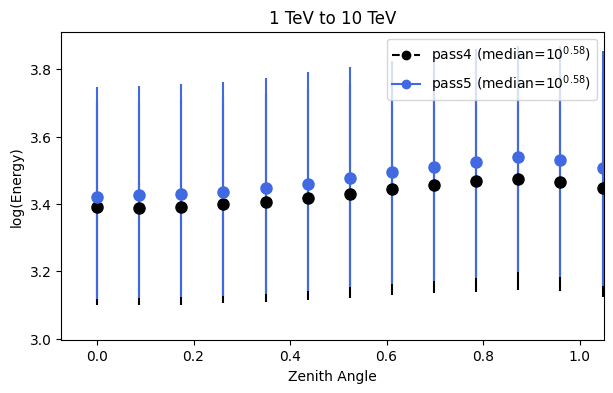

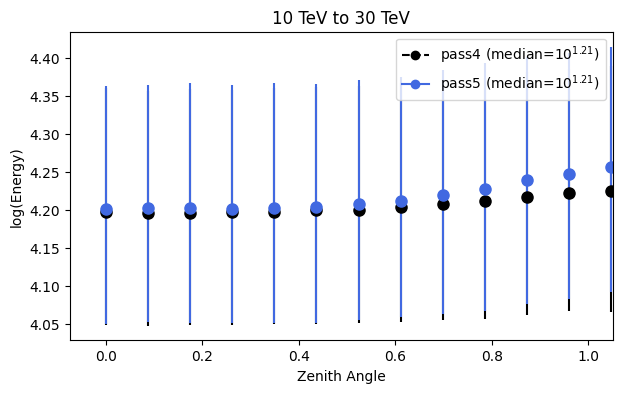

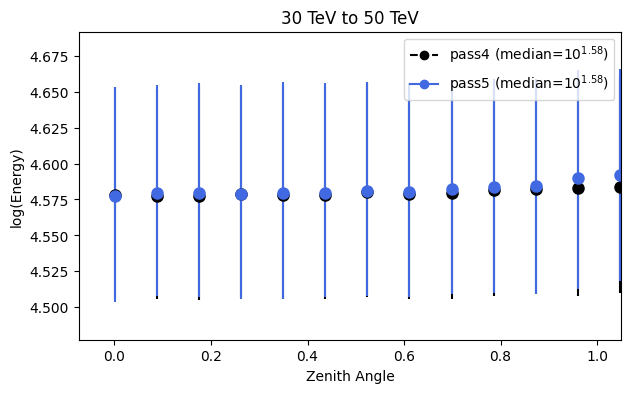

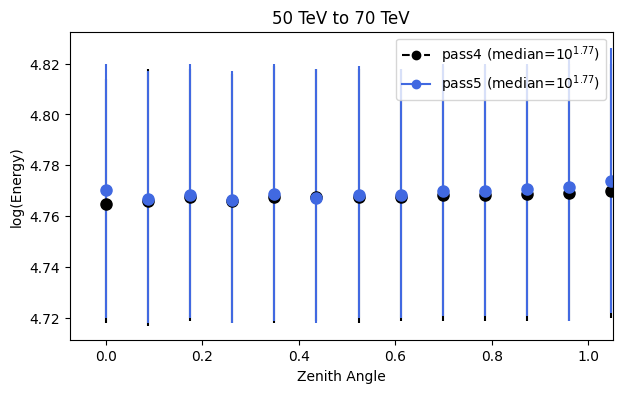

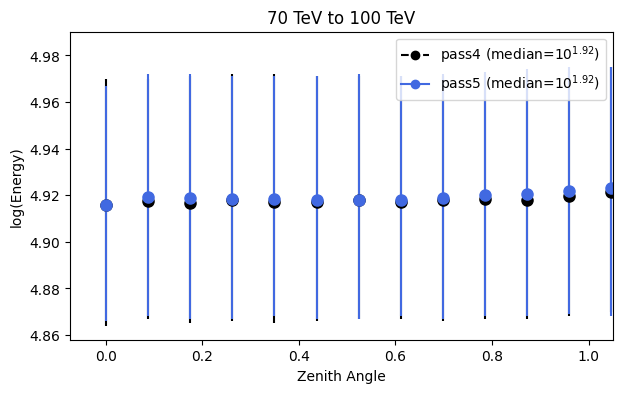

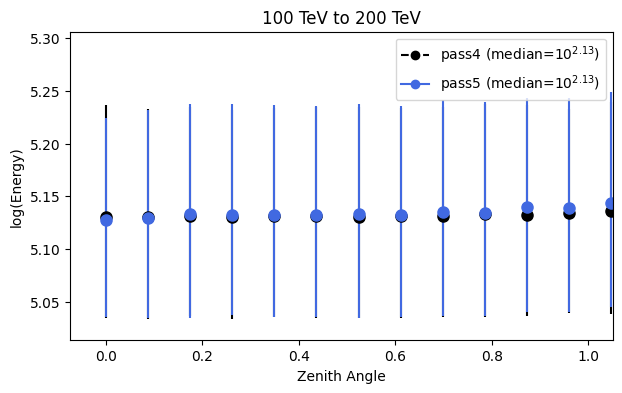

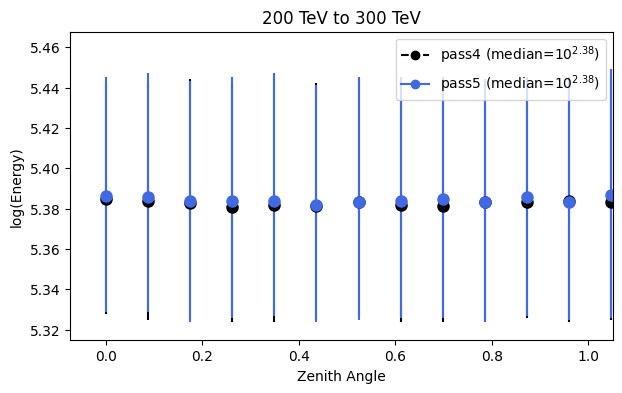

In [33]:
for i in range(7):  # Loop over the 5 cuts
    fig, ax = plt.subplots(figsize=(7, 4))
    medians = []

    for j, (energy_set, weight_set, zenith_set, color) in enumerate(zip(true_energies, true_weights_array, true_zenith_array, colors)):
        energy = energy_set[i]
        weight = weight_set[i]
        zenith = zenith_set[i]
        median_energy = np.median(energy)
        medians.append(median_energy)

        for z in zbins:
            zmin = z
            zmax = z + deltaz
            zcut = np.logical_and(zenith >= zmin, zenith <= zmax)

            if not sum(weight[zcut] > 0):
                continue

            avg_energy = np.average(energy[zcut], weights=weight[zcut])
            upper_quantile = weighted_quantile(energy[zcut], 0.841, sample_weight=weight[zcut])
            lower_quantile = weighted_quantile(energy[zcut], 0.159, sample_weight=weight[zcut])

            err_upper = upper_quantile - avg_energy
            err_lower = avg_energy - lower_quantile

            ax.errorbar(z, avg_energy, yerr=[[err_lower], [err_upper]], fmt='o', markersize=8, color=color, label=f'pass{4+j}' if z == zbins[0] else "")

    ax.set_xlabel('Zenith Angle')
    ax.set_ylabel('log(Energy)')
    ax.set_title(titles[i])
    ax.set_xlim(right = 1.05)  # 1.05 radians is 60 degrees
    
    proxy_pass4 = plt.Line2D([0], [0], linestyle='--', marker='o', color=colors[0])
    proxy_pass5 = plt.Line2D([0], [0], linestyle='-', marker='o', color=colors[1])

    median_pass4 = medians[0] - 3
    median_pass5 = medians[1] - 3
    
    ax.legend([proxy_pass4, proxy_pass5], [f'pass4 (median=$10^{{{median_pass4:.2f}}}$)', f'pass5 (median=$10^{{{median_pass5:.2f}}}$)'])
    
    plt.show()

## Reconstructed Energy

In [34]:
rec_energies = [rec_energies_4, rec_energies_5]
rec_weights_array = [rec_weights_array_4, rec_weights_array_5]
rec_zenith_array = [rec_zenith_array_4, rec_zenith_array_5]

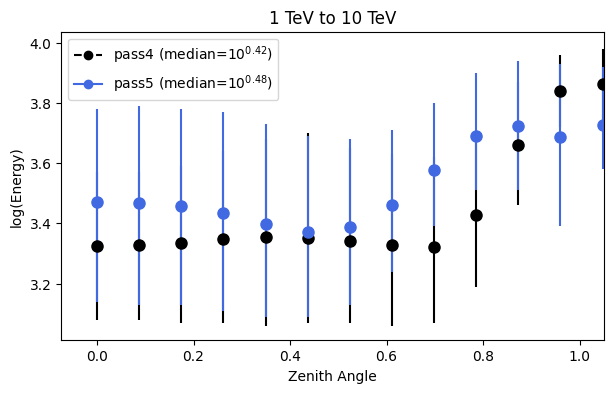

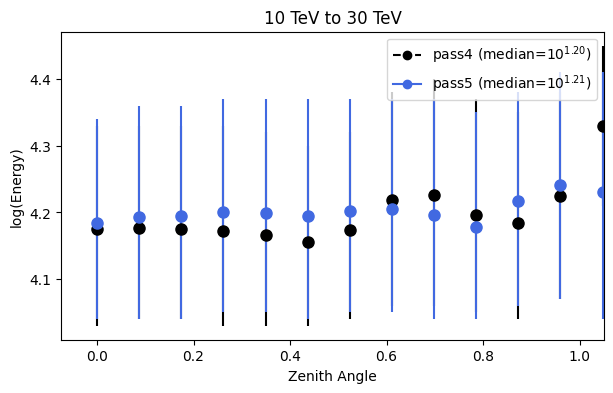

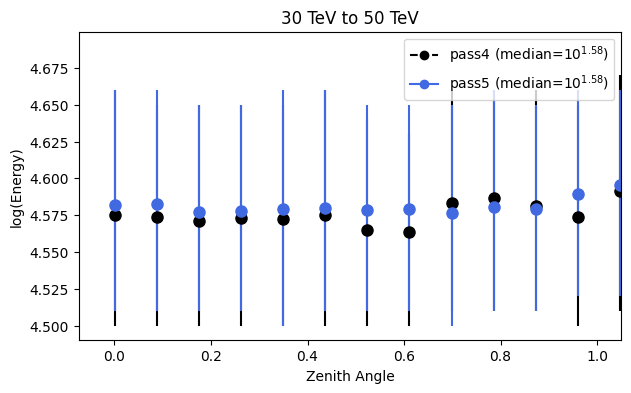

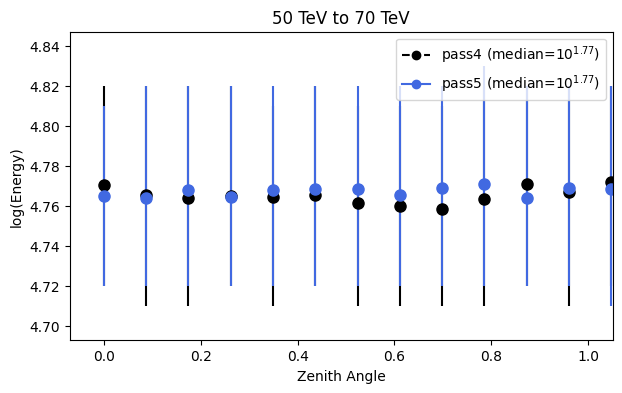

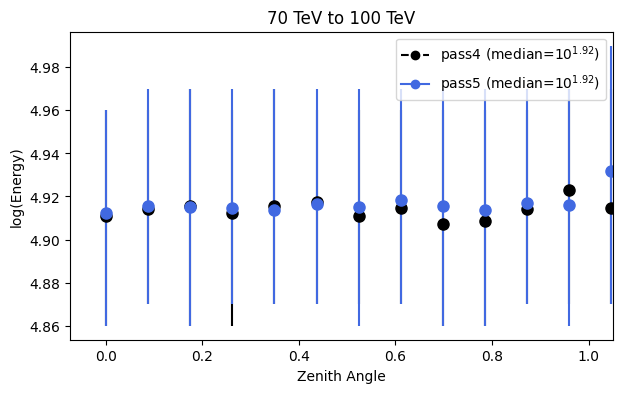

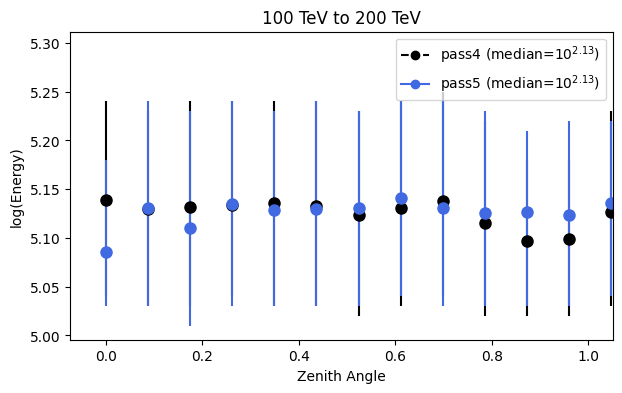

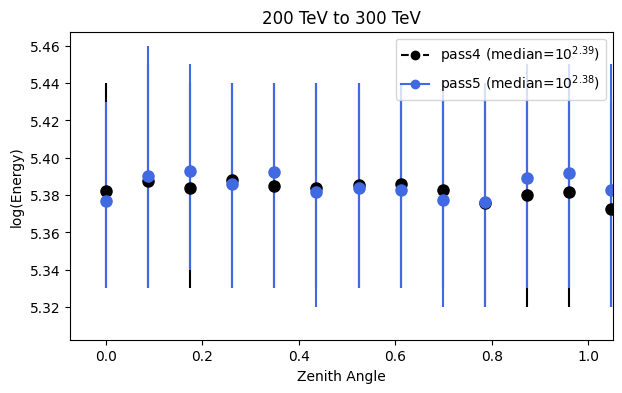

In [35]:
for i in range(7):  # Loop over the 5 cuts
    fig, ax = plt.subplots(figsize=(7, 4))
    medians = []

    for j, (energy_set, weight_set, zenith_set, color) in enumerate(zip(rec_energies, rec_weights_array, rec_zenith_array, colors)):
        energy = energy_set[i]
        weight = weight_set[i]
        zenith = zenith_set[i]
        median_energy = np.median(energy)
        medians.append(median_energy)

        for z in zbins:
            zmin = z
            zmax = z + deltaz
            zcut = np.logical_and(zenith >= zmin, zenith <= zmax)

            if not sum(weight[zcut] > 0):
                continue

            avg_energy = np.average(energy[zcut], weights=weight[zcut])
            upper_quantile = weighted_quantile(energy[zcut], 0.841, sample_weight=weight[zcut])
            lower_quantile = weighted_quantile(energy[zcut], 0.159, sample_weight=weight[zcut])

            err_upper = upper_quantile - avg_energy
            err_lower = avg_energy - lower_quantile

            ax.errorbar(z, avg_energy, yerr=[[err_lower], [err_upper]], fmt='o', markersize=8, color=color, label=f'pass{4+j}' if z == zbins[0] else "")

    ax.set_xlabel('Zenith Angle')
    ax.set_ylabel('log(Energy)')
    ax.set_title(titles[i])
    ax.set_xlim(right = 1.05)  # 1.05 radians is 60 degrees
    
    proxy_pass4 = plt.Line2D([0], [0], linestyle='--', marker='o', color=colors[0])
    proxy_pass5 = plt.Line2D([0], [0], linestyle='-', marker='o', color=colors[1])

    median_pass4 = medians[0] - 3
    median_pass5 = medians[1] - 3
    
    ax.legend([proxy_pass4, proxy_pass5], [f'pass4 (median=$10^{{{median_pass4:.2f}}}$)', f'pass5 (median=$10^{{{median_pass5:.2f}}}$)'])
    
    plt.show()

# Histogram of cuts of energies for pass 4 and pass 5.1

Define the cuts for reconstructed energy and apply those cuts on the true energy and plot

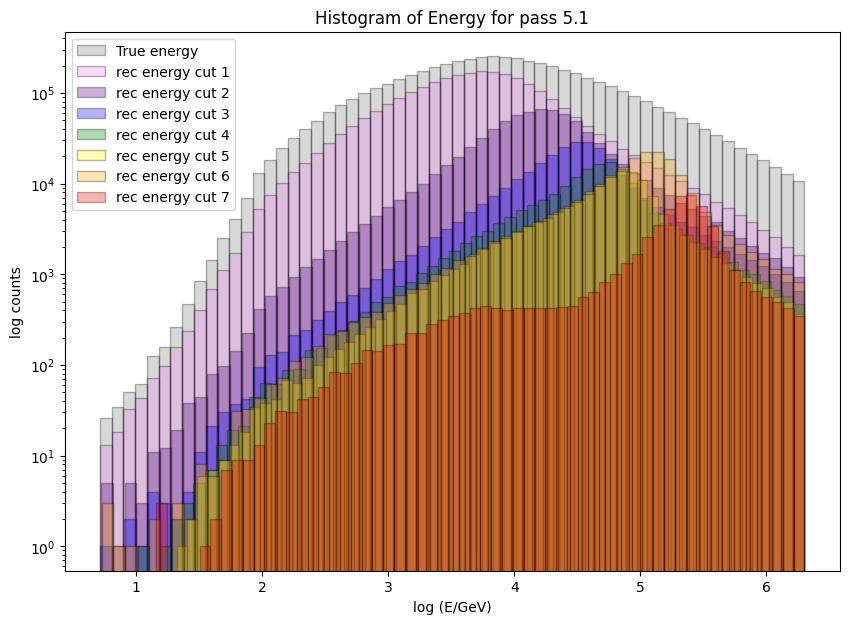

In [46]:
# histogram for pass 5.1 with all initial cuts applied
# use a for loop to plot all this
# also plot the median with a black line for each cut
plt.figure(figsize = (10,7))
plt.hist(true_log_E_5, bins = 60, histtype = 'bar', alpha = 0.3, label = "True energy", edgecolor='black', color='grey')
plt.hist(main_cut1_5, bins = 60, histtype = 'bar', alpha = 0.3, label = "rec energy cut 1", edgecolor='black', color='violet')
plt.hist(main_cut2_5, bins = 60, histtype = 'bar', alpha = 0.3, label = "rec energy cut 2", edgecolor='black', color='indigo')
plt.hist(main_cut3_5, bins = 60, histtype = 'bar', alpha = 0.3, label = "rec energy cut 3", edgecolor='black', color='blue')
plt.hist(main_cut4_5, bins = 60, histtype = 'bar', alpha = 0.3, label = "rec energy cut 4", edgecolor='black', color='green')
plt.hist(main_cut5_5, bins = 60, histtype = 'bar', alpha = 0.3, label = "rec energy cut 5", edgecolor='black', color='yellow')
plt.hist(main_cut6_5, bins = 60, histtype = 'bar', alpha = 0.3, label = "rec energy cut 6", edgecolor='black', color='orange')
plt.hist(main_cut7_5, bins = 60, histtype = 'bar', alpha = 0.3, label = "rec energy cut 7", edgecolor='black', color='red')
plt.title("Histogram of Energy for pass 5.1")
plt.xlabel("log (E/GeV)")
plt.yscale('log')
plt.ylabel("log counts")
plt.legend()
plt.show()

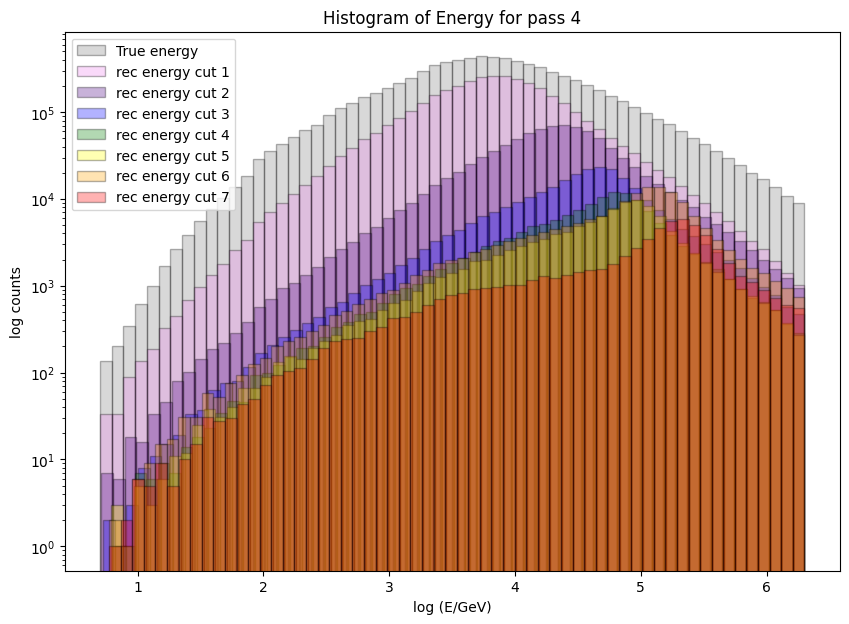

In [47]:
# histogram for pass 4 with all the inital cuts applied
# use a for loop to plot all this so that the cuts are easier to change and plot
plt.figure(figsize = (10,7))
plt.hist(true_log_E_4, bins = 60, histtype = 'bar', alpha = 0.3, label = "True energy", edgecolor='black', color='grey')
plt.hist(main_cut1_4, bins = 60, histtype = 'bar', alpha = 0.3, label = "rec energy cut 1", edgecolor='black', color='violet')
plt.hist(main_cut2_4, bins = 60, histtype = 'bar', alpha = 0.3, label = "rec energy cut 2", edgecolor='black', color='indigo')
plt.hist(main_cut3_4, bins = 60, histtype = 'bar', alpha = 0.3, label = "rec energy cut 3", edgecolor='black', color='blue')
plt.hist(main_cut4_4, bins = 60, histtype = 'bar', alpha = 0.3, label = "rec energy cut 4", edgecolor='black', color='green')
plt.hist(main_cut5_4, bins = 60, histtype = 'bar', alpha = 0.3, label = "rec energy cut 5", edgecolor='black', color='yellow')
plt.hist(main_cut6_4, bins = 60, histtype = 'bar', alpha = 0.3, label = "rec energy cut 6", edgecolor='black', color='orange')
plt.hist(main_cut7_4, bins = 60, histtype = 'bar', alpha = 0.3, label = "rec energy cut 7", edgecolor='black', color='red')
plt.title("Histogram of Energy for pass 4")
plt.xlabel("log (E/GeV)")
plt.yscale('log')
plt.ylabel("log counts")
plt.legend()
plt.show()

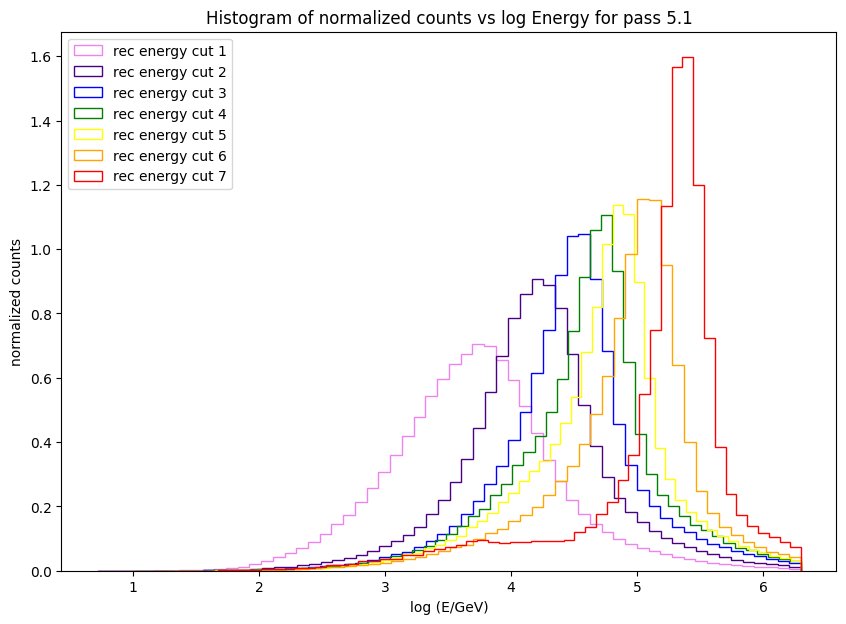

In [53]:
# normalizing the counts for pass 5.1

plt.figure(figsize = (10,7))
plt.hist(main_cut1_5, bins = 60, histtype = 'step', label = "rec energy cut 1", density = True, color='violet')
plt.hist(main_cut2_5, bins = 60, histtype = 'step', label = "rec energy cut 2", density = True, color='indigo')
plt.hist(main_cut3_5, bins = 60, histtype = 'step', label = "rec energy cut 3", density = True, color='blue')
plt.hist(main_cut4_5, bins = 60, histtype = 'step', label = "rec energy cut 4", density = True, color='green')
plt.hist(main_cut5_5, bins = 60, histtype = 'step', label = "rec energy cut 5", density = True, color='yellow')
plt.hist(main_cut6_5, bins = 60, histtype = 'step', label = "rec energy cut 6", density = True, color='orange')
plt.hist(main_cut7_5, bins = 60, histtype = 'step', label = "rec energy cut 7", density = True, color='red')
plt.title("Histogram of normalized counts vs log Energy for pass 5.1")
plt.xlabel("log (E/GeV)")
plt.ylabel("normalized counts")
plt.legend()
plt.show()

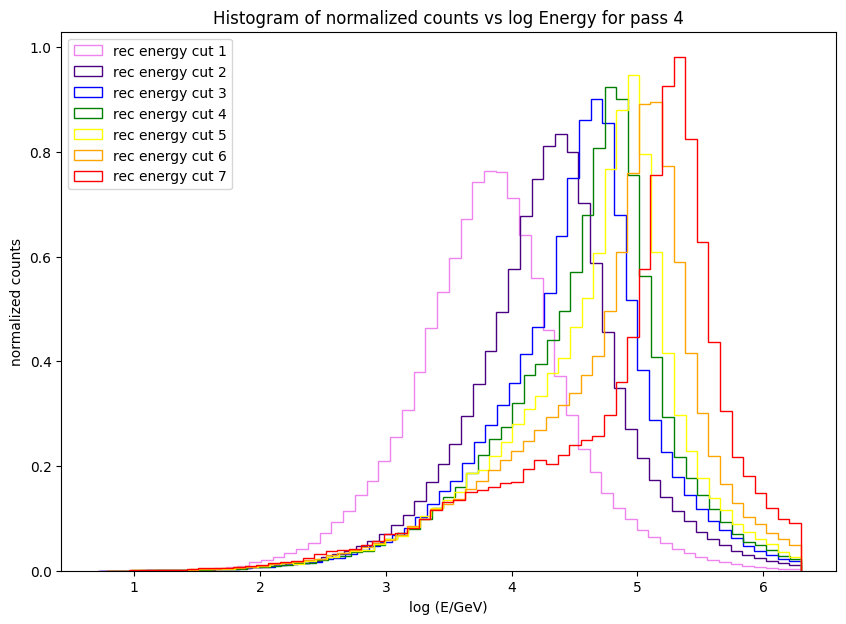

In [54]:
# normalizing the counts for pass 4

plt.figure(figsize = (10,7))
plt.hist(main_cut1_4, bins = 60, histtype = 'step', label = "rec energy cut 1", density = True, color='violet')
plt.hist(main_cut2_4, bins = 60, histtype = 'step', label = "rec energy cut 2", density = True, color='indigo')
plt.hist(main_cut3_4, bins = 60, histtype = 'step', label = "rec energy cut 3", density = True, color='blue')
plt.hist(main_cut4_4, bins = 60, histtype = 'step', label = "rec energy cut 4", density = True, color='green')
plt.hist(main_cut5_4, bins = 60, histtype = 'step', label = "rec energy cut 5", density = True, color='yellow')
plt.hist(main_cut6_4, bins = 60, histtype = 'step', label = "rec energy cut 6", density = True, color='orange')
plt.hist(main_cut7_4, bins = 60, histtype = 'step', label = "rec energy cut 7", density = True, color='red')
plt.title("Histogram of normalized counts vs log Energy for pass 4")
plt.xlabel("log (E/GeV)")
plt.ylabel("normalized counts")
plt.legend()
plt.show()

# Plotting the equation

\$ \frac{d \log{\phi} (E)}{\log{E}} = \gamma_{1} + (\gamma_{2} - \gamma_{1}) \frac{\left( \frac{E}{E_{o}} \right)^{\varepsilon}}{1 + \left( \frac{E}{E_{o}} \right)^{\varepsilon}}  \$

In [40]:
g1 = -2.52
g2 = -2.71
E0 = 3.87e4
eps = 3
def func(E):
    y = g1 + (g2 - g1)*((((E)/E0)**eps)/(1 + ((E)/E0)**eps))
    return y

In [41]:
specind1 = func(10**(true_log_E_5))

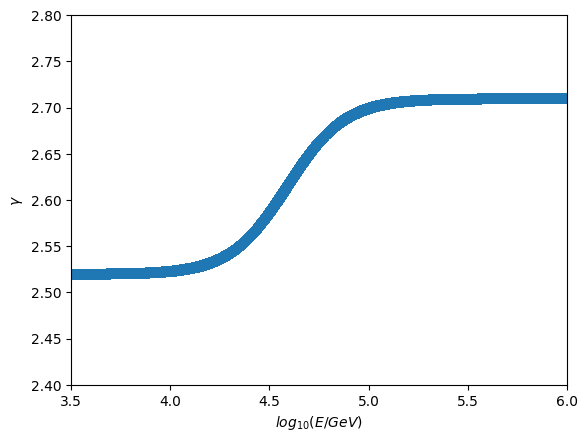

In [42]:
# true energy

plt.scatter(true_log_E_5, np.abs(specind1))
plt.ylim(2.4, 2.8)
plt.xlim(3.5,6)
plt.xlabel("$ log_{10} (E/GeV) $")
plt.ylabel("$ \gamma $")
plt.show()